In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart.csv")
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = df[['restecg', 'chol']]      
y = df['target']              

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
rf = RandomForestClassifier(random_state=0)
ab = AdaBoostClassifier(random_state=0)

In [9]:
rf.fit(X_train_scaled, y_train)
ab.fit(X_train_scaled, y_train)

# Predictions
rf_train_acc = accuracy_score(y_train, rf.predict(X_train_scaled))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test_scaled))

ab_train_acc = accuracy_score(y_train, ab.predict(X_train_scaled))
ab_test_acc = accuracy_score(y_test, ab.predict(X_test_scaled))

print("Random Forest → Train:", rf_train_acc, " Test:", rf_test_acc)
print("AdaBoost → Train:", ab_train_acc, " Test:", ab_test_acc)


Random Forest → Train: 0.8841463414634146  Test: 0.8292682926829268
AdaBoost → Train: 0.6914634146341463  Test: 0.6439024390243903


In [10]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('ab', ab)],
    voting='soft'   # Try 'hard' or 'soft' to compare
)

voting_clf.fit(X_train_scaled, y_train)

voting_train_acc = accuracy_score(y_train, voting_clf.predict(X_train_scaled))
voting_test_acc = accuracy_score(y_test, voting_clf.predict(X_test_scaled))

print("\nVoting Classifier (Soft) Results:")
print(f"Training Accuracy: {voting_train_acc:.4f}")
print(f"Testing Accuracy : {voting_test_acc:.4f}")


Voting Classifier (Soft) Results:
Training Accuracy: 0.8841
Testing Accuracy : 0.8293


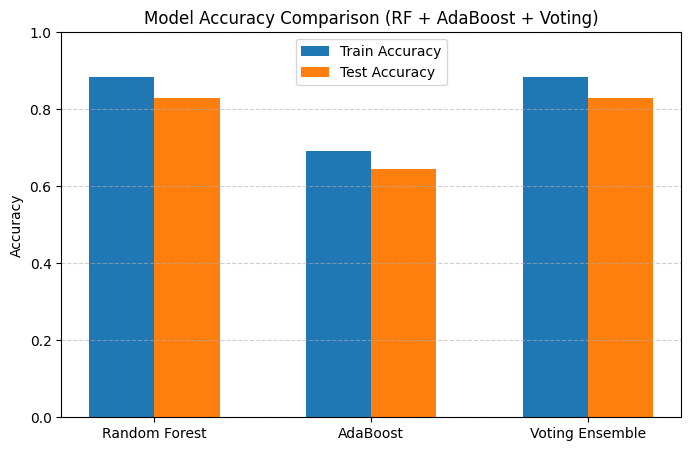

In [11]:
models = ['Random Forest', 'AdaBoost', 'Voting Ensemble']
train_acc = [rf_train_acc, ab_train_acc, voting_train_acc]
test_acc = [rf_test_acc, ab_test_acc, voting_test_acc]

plt.figure(figsize=(8, 5))
x = np.arange(len(models))
plt.bar(x - 0.15, train_acc, width=0.3, label='Train Accuracy')
plt.bar(x + 0.15, test_acc, width=0.3, label='Test Accuracy')
plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (RF + AdaBoost + Voting)')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()